<a href="https://colab.research.google.com/github/JosiasRuiz/MarriotMNA/blob/main/ImageCoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JosiasRuiz/MarriotMNA.git

Cloning into 'MarriotMNA'...
remote: Enumerating objects: 541, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 541 (delta 22), reused 49 (delta 8), pack-reused 468
Receiving objects: 100% (541/541), 997.58 MiB | 33.24 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Updating files: 100% (468/468), done.


In [2]:
import json
import csv
import base64
import os
import io
import random
import pathlib
import calendar

from IPython.display import HTML
from base64 import b64encode
from datetime import date
from datetime import timedelta

Función para visualizar imagen capturada por el formulario

562725



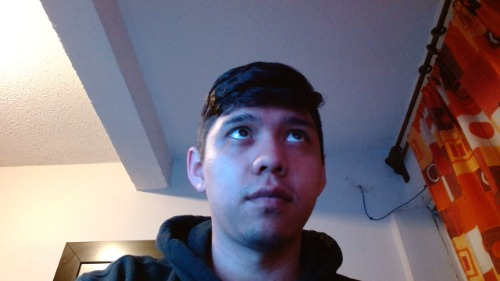

In [ ]:
with open("MarriotMNA/562725.json", "r") as f:
  file_data = json.load(f)
print(file_data["id_reservation"])
image_bytes = file_data["img"]
image_bytes = image_bytes[23:]

width=None
height=None

data_url = 'data:image/jpeg;base64,' + image_bytes

width_str = "width='%d'" % (width) if width is not None else ''
height_str = "height='%d'" % (width) if height is not None else ''
display(HTML("<img src='%s' %s%s>" % (data_url, width_str, height_str)))

Función para extraer la imagen del JSON y guardarla en formato JPG

In [ ]:
with open("MarriotMNA/562725.json", "r") as f:
  file_data = json.load(f)
#print(file_data["id_reservation"])
image_data  =  base64.b64decode(file_data["img"].split(",")[1])

with open("562725.jpg", "wb") as f:
    f.write(image_data)

562725


Funciones para definir registro sintético

* "id_reservation":562725,
* "fullName":"Jorge",
* "email":"jorge@gmail.com",
* "phoneNumber":"5542146",
* "arrivalDate":"2023-02-20",
* "arrivalHour":"2",
* "checkoutDate":"2023-06-20",
* checkoutHour":"2",
* "roomType":"Suite",
* "specialRequests":"nothing",
* "img":"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQ...

In [ ]:
def generate_full_name(origin):
    if origin == "asian":
        return random.choice([
            "Li Ming",
            "Zhang Wei",
            "Wang Xiao",
            "Chen Yu",
            "Liu Hao"
        ])
    elif origin == "hispanic":
        return random.choice([
            "Juan Pérez",
            "María García",
            "José López",
            "Ana Rodríguez",
            "Pedro Sánchez"
        ])
    elif origin == "american":
        return random.choice([
            "John Smith",
            "Mary Jones",
            "David Brown",
            "Susan Williams",
            "Michael Johnson"
        ])

def generate_email():
    #Genera una cadena que representa un correo
    length = random.randint(10, 30)
    return "".join(random.choice("abcdefghijklmnopqrstuvwxyz0123456789") for _ in range(length)) + "@gmail.com"

def generate_phone_number():
    #Genera una cadena de numeros representa un numero telefonico
    return "+" + str(random.randint(1, 999)) + str(random.randint(1, 999)) + str(random.randint(1, 999)) + str(random.randint(1, 999)) + str(random.randint(1, 999))

def generate_id_reservation():
    #Genera una cadena de numeros random para un id
    return str(random.randint(1, 999)) + str(random.randint(1, 999)) + str(random.randint(1, 999)) + str(random.randint(1, 999)) + str(random.randint(1, 999))

def generate_arrival_date():
    #Considera una fecha posterior a 11/09 entre 1 y 10 días posteriores
    start_date = date.today() + timedelta(days=random.randint(1, 10))
    return start_date

def generate_arrival_hour():
    return random.randint(0, 24)

def generate_checkout_date(arrival_date):
    #Considera checkout date entre 3 y 15 días más que la fecha de checkin
    checkout_date = arrival_date + timedelta(days=random.randint(3, 15))
    return str(checkout_date)

def generate_checkout_hour():
    return random.randint(0, 24)

def generate_room_type():
    return random.choice(["Suite", "Familiar", "Double", "Single"])

def generate_special_requests():
    return random.choice(["nothing", "early check-in", "late check-out", "extra bed", "breakfast included"])

def generate_image(folder):
  #Se selecciona aleatoreamente una de las 2 imagenes de identificacion del DS
    imagen = f"data:image/jpeg;base64," + base64.standard_b64encode(open(f"MarriotMNA/DS/{folder}/ID_"+str(random.randint(1, 2))+".jpg", "rb").read()).decode()
    #imagen = base64.standard_b64encode(open(f"MarriotMNA/DS/{folder}/ID_"+str(random.randint(1, 2))+".jpg", "rb").read()).decode()
    return imagen

def generate_json_data(folder):
    arrival_date=generate_arrival_date()
    data = {"id_reservation": generate_id_reservation(),
        "fullName": generate_full_name(random.choice(["asian", "hispanic", "american"])),
        "email": generate_email(),
        "phoneNumber": generate_phone_number(),
        "arrivalDate": str(arrival_date),
        "arrivalHour": generate_arrival_hour(),
        "checkoutDate": generate_checkout_date(arrival_date),
        "checkoutHour": generate_checkout_hour(),
        "roomType": generate_room_type(),
        "specialRequests": generate_special_requests(),
        "img": generate_image(folder)
        }
    return data

def extraer_nombres_carpetas(directorio):
  nombres_carpetas = []
  for carpeta in pathlib.Path(directorio).iterdir():
    if carpeta.is_dir():
      nombres_carpetas.append(carpeta.name)
  return nombres_carpetas

Exportar registro en JSON

In [ ]:
def main():

  folders = extraer_nombres_carpetas("MarriotMNA/DS")
  for folder in folders:
    print(folder)
    # Llamamos a la función para crear el archivo JSON
    registro = generate_json_data(folder)
    #print(registro)
    id = registro["id_reservation"]
    print(id)
    file_name="MarriotRegistros/"+str(id) + ".json"
    #print(file_name)
    if not os.path.exists(file_name):
    # Si el archivo no existe, lo creamos
      archivo = io.open(file_name, "w")
      archivo.close()
    json.dump(registro, open(file_name, "w"))
    #print(registro)

if __name__ == "__main__":
    main()


0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo
0001cc1e1e--61af8bd7667cba1b473506bd_age_34_name_Rômulo
0001ca9b9a--61ac9cfdd211124f5daebd40_age_33_name_Mykhailo
0001ca9b9a--61aa90111e37d6183d870ea5_age_34_name_Clarissa
0001ca9b9a--61ad04a074501f072eccf903_age_20_name_Alessandro
0001cc1e1e--61af8aa9d46ff461a71462cc_age_31_name_Daiane
0001ca9b9a--61acdab83e0f222c5afd75a2_age_51_name_Gülten Çayırcı
0001ca9b9a--61ad4051889fb241713def3a_age_18_name_Mark
0001cc1e1e--61af892e1735844b198f7269_age_28_name_Luis
0001cc1e1e--61af8d4045612c79df65d153_age_20_name_Bruno
0001ca9b9a--61af4a11ec7c4619a7c95ddf_age_18_name_Anastasia
0001ca9b9a--61ab9a5e686e3d72a4be5551_age_18_name_Diego
0001cc1e1e--61af8513667cba1b47349869_age_25_name_Weslley
0001ca9b9a--61abcfbb45612c79df4dba1f_age_22_name_Anna
0001ca9b9a--61ab21f4277a1c323b746383_age_23_name_Andrea Ran
0001cc1e1e--61af8a351735844b198f7ade_age_26_name_Fernanda
0001ca9b9a--61adf4903e0f222c5a048507_age_20_name_Kasia
0001cc1e1e--61af86f374501f072

In [ ]:
!zip -r /content/Export.zip /content/MarriotRegistros/

  adding: content/MarriotRegistros/ (stored 0%)
  adding: content/MarriotRegistros/179723823742296.json (deflated 24%)
  adding: content/MarriotRegistros/72387283589670.json (deflated 25%)
  adding: content/MarriotRegistros/505533428513171.json (deflated 24%)
  adding: content/MarriotRegistros/3839845523261.json (deflated 24%)
  adding: content/MarriotRegistros/.ipynb_checkpoints/ (stored 0%)
  adding: content/MarriotRegistros/271966367562768.json (deflated 25%)
  adding: content/MarriotRegistros/56102826282654.json (deflated 24%)
  adding: content/MarriotRegistros/695100479904589.json (deflated 25%)
  adding: content/MarriotRegistros/55688391369378.json (deflated 25%)
  adding: content/MarriotRegistros/577256777286354.json (deflated 25%)
  adding: content/MarriotRegistros/34422772768859.json (deflated 25%)
  adding: content/MarriotRegistros/969675508903191.json (deflated 25%)
  adding: content/MarriotRegistros/807364745439654.json (deflated 24%)
  adding: content/MarriotRegistros/9978

Validación de registro sintetico

id_reservation: 10597975874092
fullName: Ana Rodríguez
email: lmokwk5waim4devbdaortf1hg5xzmk@gmail.com
phoneNumber: +985233254528754
arrivalDate: 2023-11-11
arrivalHour: 6
checkoutDate: 2023-11-23
checkoutHour: 9
roomType: Suite
specialRequests: late check-out



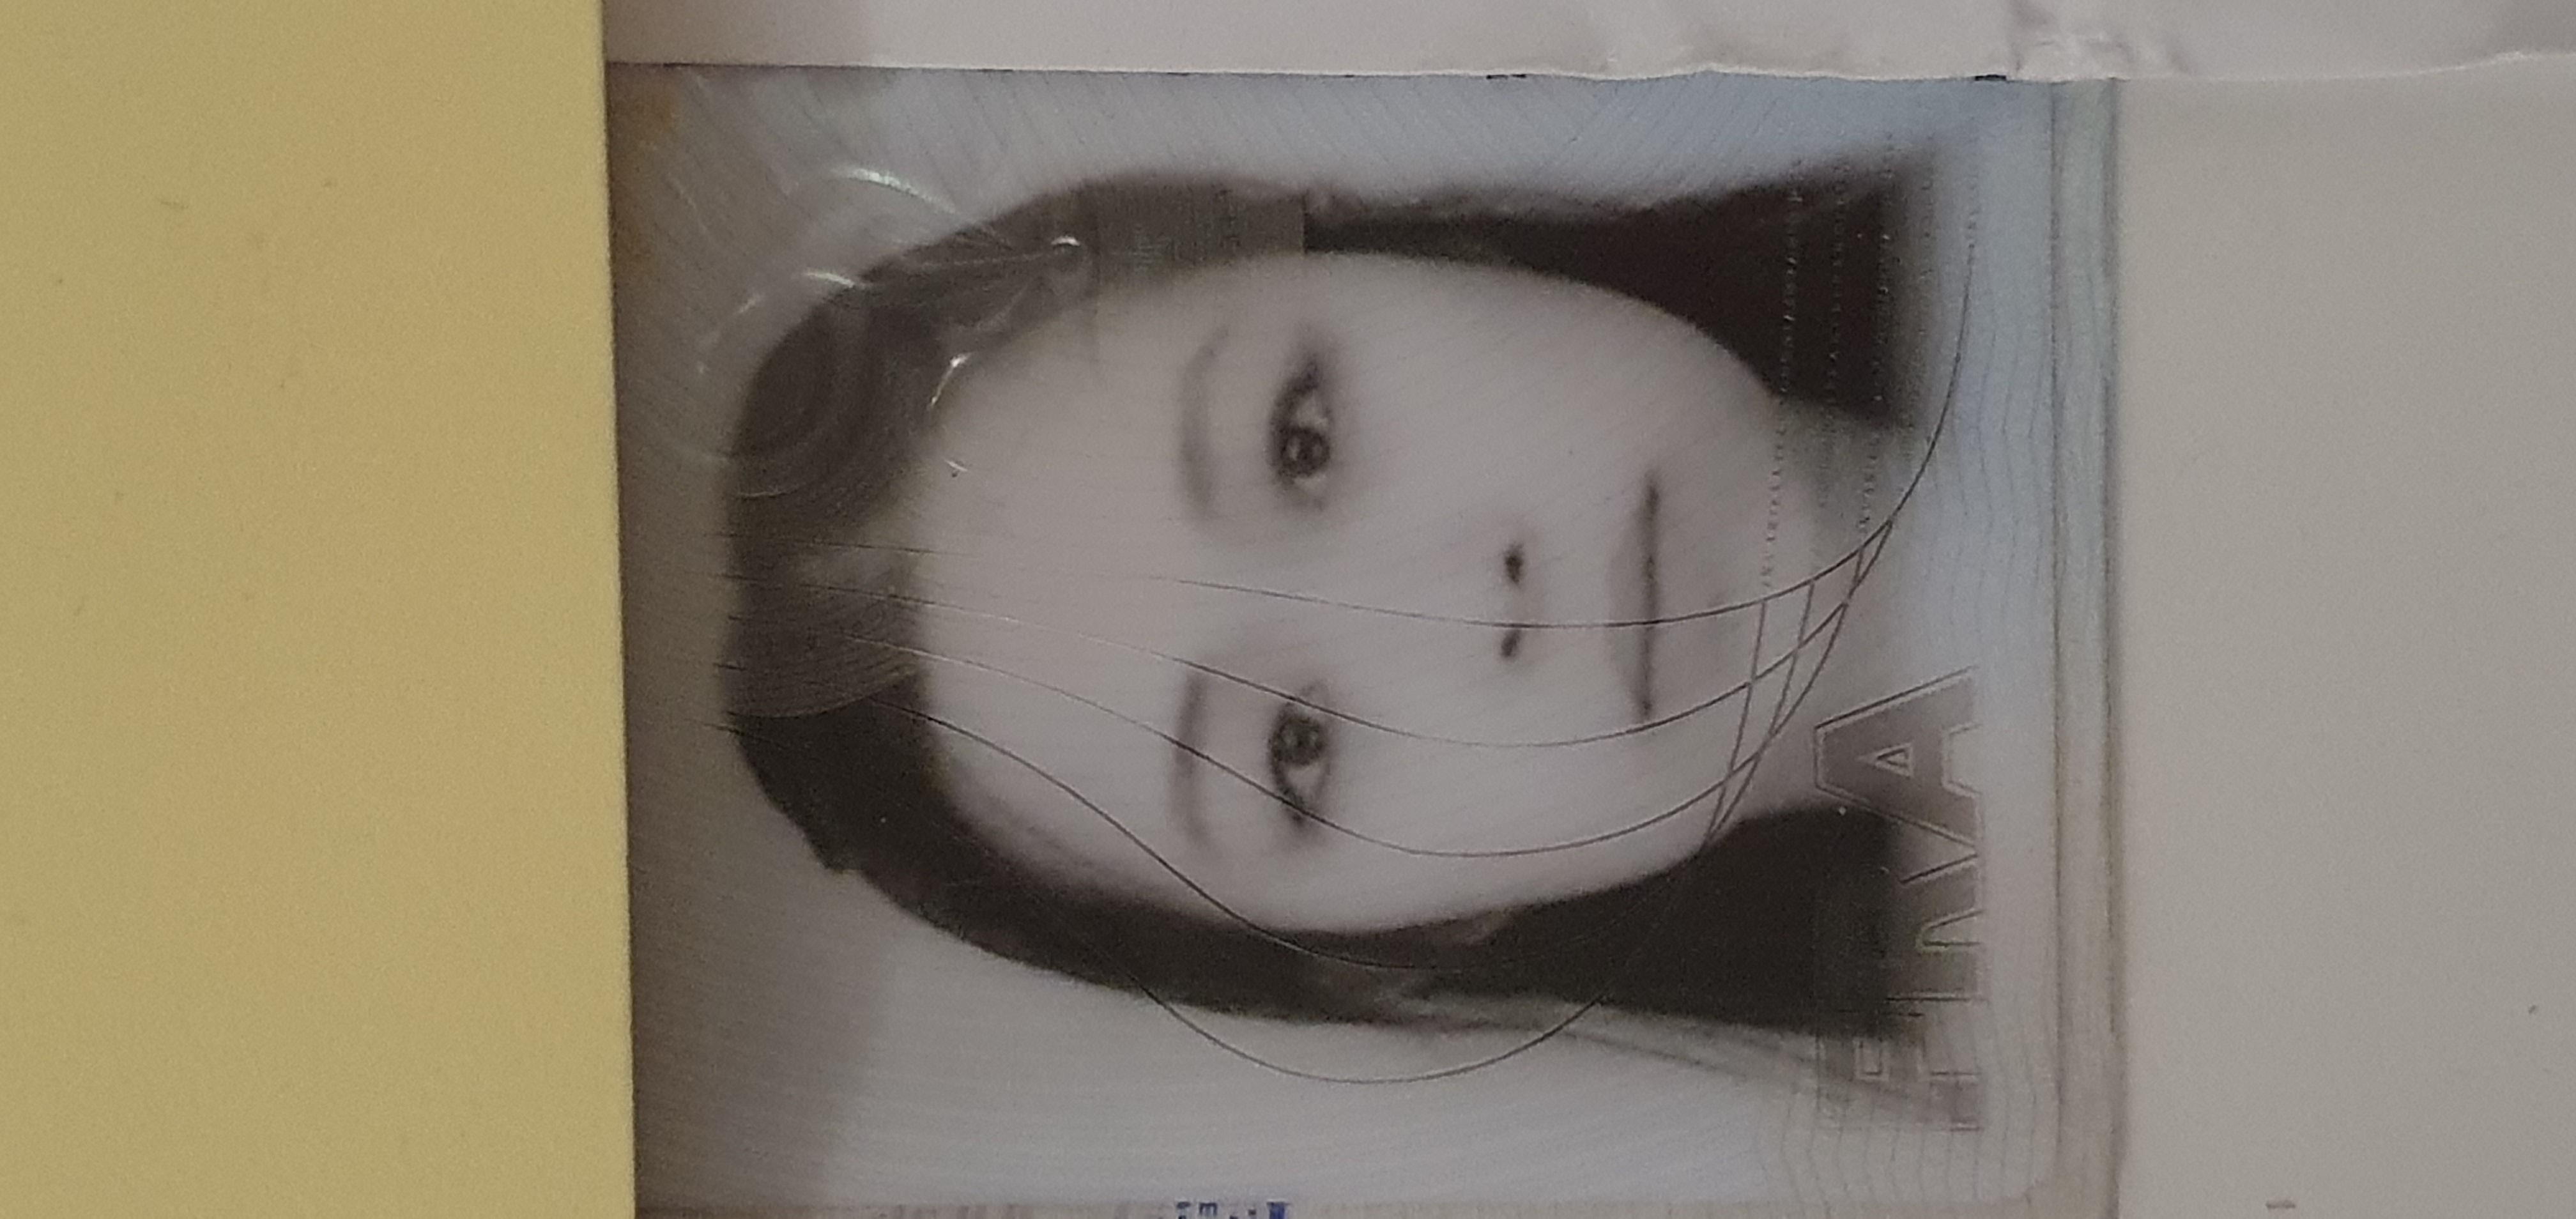

In [6]:
with open("MarriotMNA/MarriottRegistros/10597975874092.json", "r") as f:
  file_data = json.load(f)
for key, value in file_data.items():
  if key != 'img':
    print(f'{key}: {value}')

image_bytes = file_data["img"]
image_bytes = image_bytes[23:]

width=400
height=800

data_url = 'data:image/jpeg;base64,' + image_bytes

width_str = "width='%d'" % (width) if width is not None else ''
height_str = "height='%d'" % (width) if height is not None else ''
display(HTML("<img src='%s' %s%s>" % (data_url, width_str, height_str)))

Conexion a Rekognition AWS

In [4]:
!pip install boto3
!pip install botocore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 14.5 MB/s eta 0:00:00


In [5]:
import boto3
from botocore.config import Config
from PIL import Image, ImageDraw, ImageFont

In [ ]:
image_name ="/content/MarriotMNA/DS/0001ca9b9a--61aa90111e37d6183d870ea5_age_34_name_Clarissa/ID_1.jpg"
with open(image_name, 'rb') as image_data:
        response_content = image_data.read()

rekognition_response = rekognition.detect_faces(
        Image={'Bytes': response_content}, Attributes=['ALL'])

In [ ]:
image = Image.open(image_name)
image_width, image_height = image.size
draw = ImageDraw.Draw(image)

line_width = 3
for item in rekognition_response.get('FaceDetails'):
    bounding_box = item['BoundingBox']
    width = image_width * bounding_box['Width']
    height = image_height * bounding_box['Height']
    left = image_width * bounding_box['Left']
    top = image_height * bounding_box['Top']

    left = int(left)
    top = int(top)
    width = int(width) + left
    height = int(height) + top

    draw.rectangle(((left, top), (width, height)),
                    outline='red', width=line_width)

    face_emotion_confidence = 0
    face_emotion = None
    for emotion in item.get('Emotions'):
        if emotion.get('Confidence') >= face_emotion_confidence:
            face_emotion_confidence = emotion['Confidence']
            face_emotion = emotion.get('Type')

    draw.text((left, top), face_emotion, 'white')

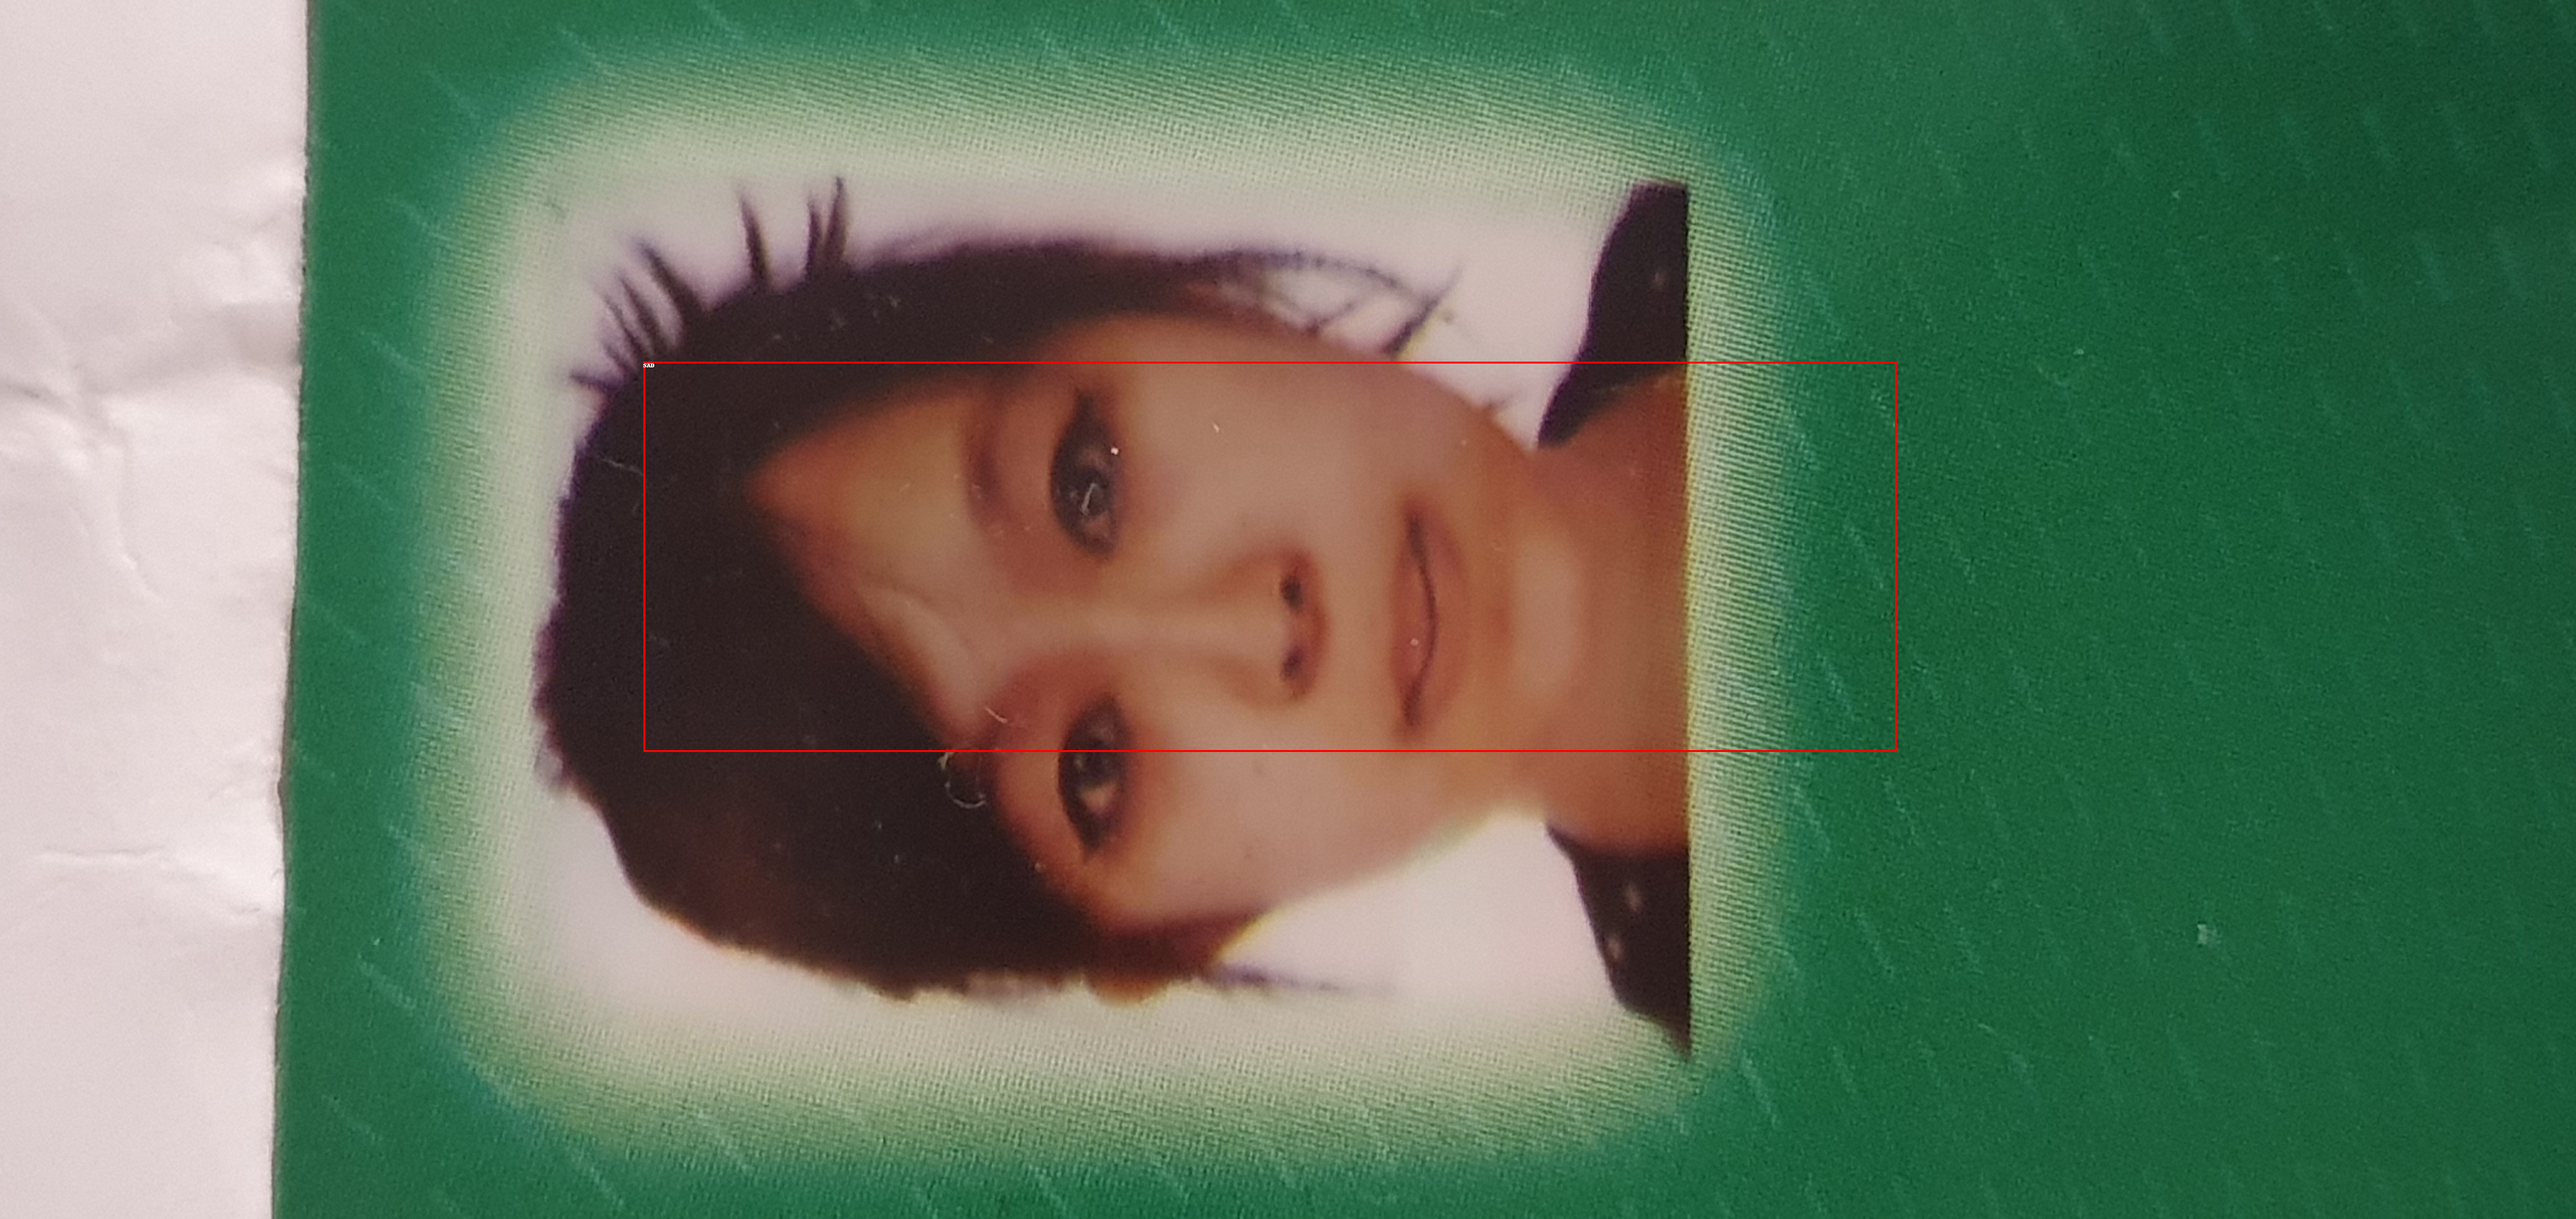

In [ ]:
image

Funcion lambda para monitorear bucket

In [ ]:
import boto3

def get_latest_file_content(event, context):
    # Obtenemos el bucket de S3 del evento
    s3 = boto3.client('s3')
    bucket_name = event['Records'][0]['s3']['bucket']['name']

    # Listamos los objetos en el bucket de S3
    objects = s3.list_objects(Bucket=bucket_name)

    # Obtenemos el último objeto de la lista
    latest_object = objects['Contents'][-1]

    # Obtenemos el contenido del objeto
    object_content = s3.get_object(Bucket=bucket_name, Key=latest_object['Key'])['Body'].read()

    # Obtenemos el correo electrónico del objeto
    email = object_content.decode('utf-8').split(',')[0]

    # Si el archivo JSON contiene los campos de reservacion, movemos el archivo a input
    if email != "":
        # Obtenemos el bucket de destino
        destination_bucket_name = 'marriott-input'
    else:
    # Si el archivo JSON no contiene los campos de reservacion, movemos el archivo a checkin
        destination_bucket_name = 'marriot-checkin'

    # Copiamos el archivo en el bucket correspondiente
    s3.copy_object(
        CopySource={
            'Bucket': bucket_name,
            'Key': latest_object['Key']
        },
        Bucket=destination_bucket_name,
        Key=latest_object['Key']
    )

    # Borramos el archivo
    s3.delete_object(Bucket=bucket_name, Key=latest_object['Key'])

    return {
        'statusCode': 200,
        'body': object_content.decode('utf-8')
    }